In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('StrokeDB.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18451 entries, 0 to 18450
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   SEX      18451 non-null  object
 1   AGE      18451 non-null  int64 
 2   RATRIAL  18451 non-null  object
 3   RVISINF  18451 non-null  object
 4   RASP3    18451 non-null  object
 5   RSBP     18451 non-null  int64 
 6   RDEF1    18451 non-null  object
 7   RDEF2    18451 non-null  object
 8   RDEF3    18451 non-null  object
 9   RDEF4    18451 non-null  object
 10  RDEF5    18451 non-null  object
 11  RDEF6    18451 non-null  object
 12  RDEF7    18451 non-null  object
 13  RDEF8    18451 non-null  object
 14  DIED     18451 non-null  int64 
 15  DEAD1    18451 non-null  int64 
 16  DEAD2    18451 non-null  int64 
 17  DEAD3    18451 non-null  int64 
 18  DEAD4    18451 non-null  int64 
 19  DEAD5    18451 non-null  int64 
 20  DEAD6    18451 non-null  int64 
 21  DEAD7    18451 non-null  int64 
 22

In [5]:
df.describe()

,AGE,RSBP,DIED,DEAD1,DEAD2,DEAD3,DEAD4,DEAD5,DEAD6,DEAD7,DEAD8
count,18451.000000,18451.000000,18451.000000,18451.000000,18451.000000,18451.000000,18451.000000,18451.000000,18451.000000,18451.000000,18451.000000
mean,0.528481,0.350604,0.225408,0.076527,0.028291,0.003848,0.042654,0.019186,0.008563,0.027749,0.011815
std,0.848968,0.936549,0.417862,0.265847,0.165808,0.061915,0.202080,0.137182,0.092143,0.164258,0.108056
min,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
df.isnull().values.any()

False

In [33]:
DIED_true_count = len(df.loc[df['DIED'] == True])
DIED_false_count = len(df.loc[df['DIED'] == False])

In [34]:
(DIED_true_count, DIED_false_count )

(4159, 14292)

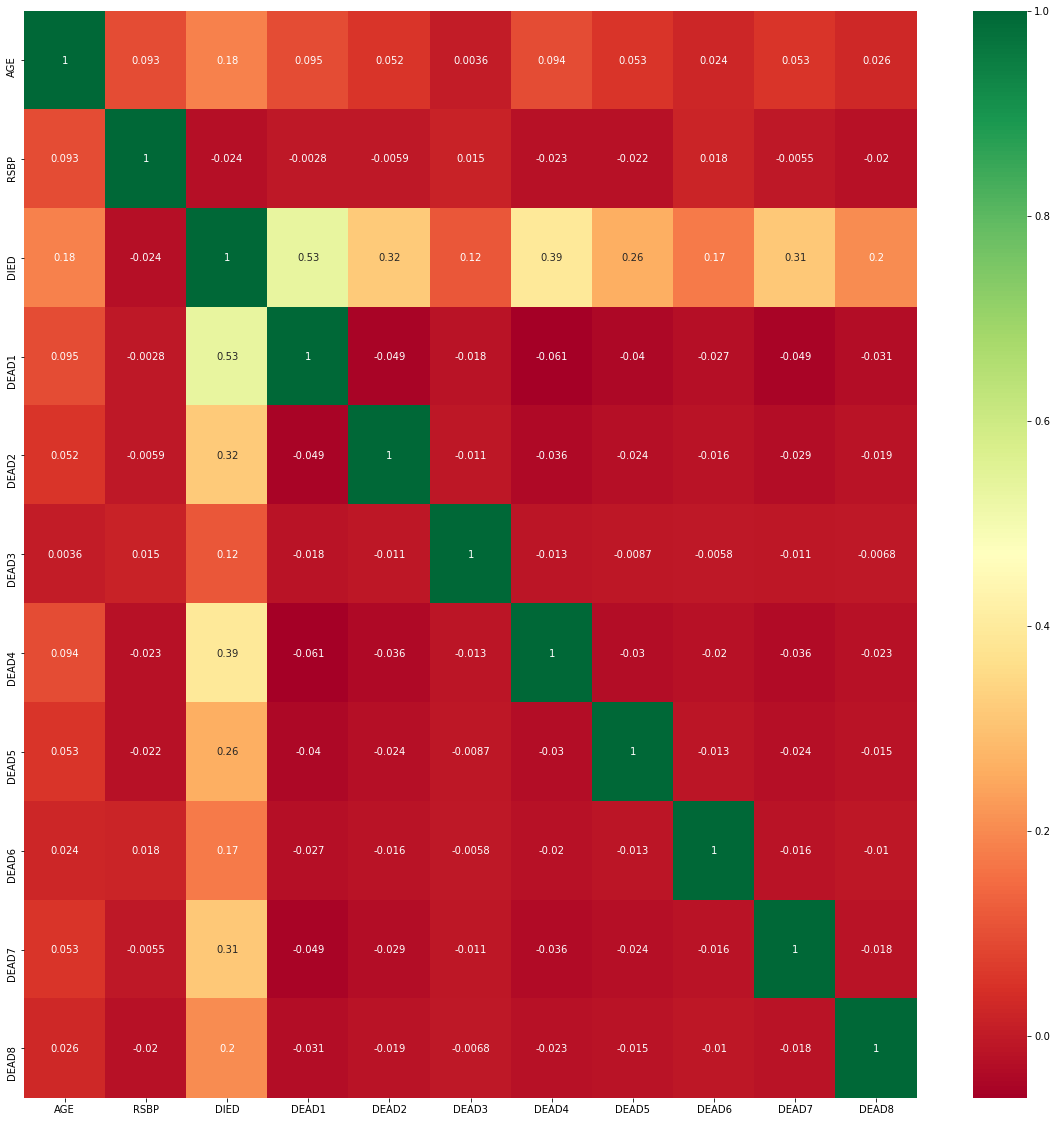

In [6]:
import seaborn as sns

#correlations of each feature
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")

array([[<AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'RSBP'}>,
        <AxesSubplot:title={'center':'DIED'}>],
       [<AxesSubplot:title={'center':'DEAD1'}>,
        <AxesSubplot:title={'center':'DEAD2'}>,
        <AxesSubplot:title={'center':'DEAD3'}>],
       [<AxesSubplot:title={'center':'DEAD4'}>,
        <AxesSubplot:title={'center':'DEAD5'}>,
        <AxesSubplot:title={'center':'DEAD6'}>],
       [<AxesSubplot:title={'center':'DEAD7'}>,
        <AxesSubplot:title={'center':'DEAD8'}>, <AxesSubplot:>]],
      dtype=object)

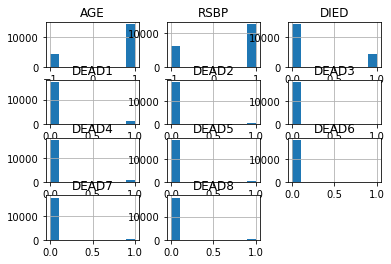

In [7]:
df.hist()

<AxesSubplot:xlabel='DIED', ylabel='count'>

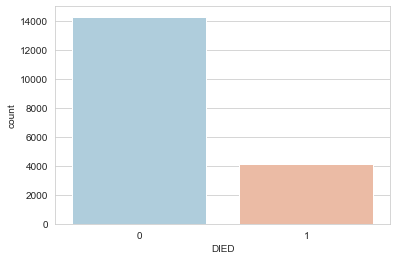

In [9]:
sns.set_style('whitegrid')
sns.countplot(x ='DIED', data = df, palette = 'RdBu_r')

In [40]:
#creating dummy variables
dataset = pd.get_dummies(df, columns = ['SEX', 'RATRIAL', 'RVISINF', 'RASP3', 'RDEF1', 'RDEF2', 'RDEF3', 'RDEF4', 'RDEF5', 'RDEF6', 'RDEF7', 'RDEF8'])

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['AGE', 'RSBP', 'DEAD1', 'DEAD2', 'DEAD2', 'DEAD3', 'DEAD4', 'DEAD5', 'DEAD6', 'DEAD7', 'DEAD8']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [14]:
dataset.head()

,AGE,RSBP,DIED,DEAD1,DEAD2,DEAD3,DEAD4,DEAD5,DEAD6,DEAD7,...,RDEF5_Y,RDEF6_C,RDEF6_N,RDEF6_Y,RDEF7_C,RDEF7_N,RDEF7_Y,RDEF8_C,RDEF8_N,RDEF8_Y
0,0.555418,0.693411,0,-0.287869,-0.170631,-0.062152,-0.211078,-0.139862,-0.092936,-0.168941,...,0,0,1,0,0,1,0,0,1,0
1,0.555418,-1.442146,1,3.473799,-0.170631,-0.062152,-0.211078,-0.139862,-0.092936,-0.168941,...,1,0,1,0,1,0,0,0,1,0
2,0.555418,-1.442146,0,-0.287869,-0.170631,-0.062152,-0.211078,-0.139862,-0.092936,-0.168941,...,0,0,1,0,0,1,0,0,1,0
3,0.555418,-1.442146,0,-0.287869,-0.170631,-0.062152,-0.211078,-0.139862,-0.092936,-0.168941,...,1,0,0,1,1,0,0,0,0,1
4,-1.800447,-1.442146,0,-0.287869,-0.170631,-0.062152,-0.211078,-0.139862,-0.092936,-0.168941,...,0,0,1,0,0,1,0,0,1,0


K Neighbor Classifier

In [16]:
y = dataset['DIED']
X = dataset.drop(['DIED'], axis = 1)

In [17]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(knn_classifier, X, y, cv = 10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbor Classifier Scores for different K values')

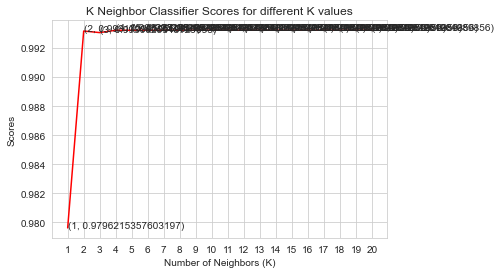

In [18]:
plt.plot([k for k in range(1,21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1,21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbor Classifier Scores for different K values')

In [61]:
knn_classifier = KNeighborsClassifier(n_neighbors = 19)
score = cross_val_score(knn_classifier, X, y, cv = 10)


In [62]:
score.mean()

0.9914366960571014

 Random Forest Classifier

In [55]:
from sklearn.model_selection import train_test_split
feature_columns = ['AGE', 'RSBP', 'DEAD1', 'DEAD2', 'DEAD3', 'DEAD4', 'DEAD5', 'DEAD6', 'DEAD7', 'DEAD8', 'RDEF1', 'RDEF2', 'RDEF3', 'RDEF4', 'RDEF5', 'RDEF6', 'RDEF7', 'RDEF8',]
predicted_class = ['DIED']

In [56]:
X = df[feature_columns].values
y = df[predicted_class].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

In [57]:
#Random Classifier

from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state = 10)

random_forest_model.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=10)

In [58]:
predict_train_data = random_forest_model.predict(X_test)
from sklearn import metrics 
print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.992


SVM

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

#12915 x 10
X_train.shape

#12915 x 1
y_train.shape

#5536 x 10
X_test.shape

#5536 x 1
y_test.shape

(5536, 1)

In [70]:
from sklearn import svm
classifier = svm.SVC(kernel = 'linear', gamma = 'auto', C = 2)
classifier.fit(X_train, y_train)

SVC(C=2, gamma='auto', kernel='linear')

In [71]:
y_predict = classifier.predict(X_test)

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4318
           1       1.00      0.96      0.98      1218

    accuracy                           0.99      5536
   macro avg       0.99      0.98      0.99      5536
weighted avg       0.99      0.99      0.99      5536



Naive Bayes

In [73]:
target = df.DIED
inputs = df.drop('DIED', axis = 'columns')

In [74]:
dummies = pd.get_dummies(inputs.SEX)
dummies.head(3)

,F,M
0,0,1
1,0,1
2,1,0


In [77]:
dummies = pd.get_dummies(inputs.RATRIAL)
dummies.head(3)                        

,N,Y
0,1,0
1,1,0
2,1,0


In [78]:
dummies = pd.get_dummies(inputs.RVISINF)
dummies.head(3)

,N,Y
0,1,0
1,1,0
2,1,0


In [79]:
dummies = pd.get_dummies(inputs.RASP3)
dummies.head(3)

,N,Y
0,1,0
1,1,0
2,1,0


In [80]:
dummies = pd.get_dummies(inputs.RDEF1)
dummies.head(3)

,C,N,Y
0,0,0,1
1,0,0,1
2,0,0,1


In [81]:
dummies = pd.get_dummies(inputs.RDEF2)
dummies.head(3)

,C,N,Y
0,0,0,1
1,0,0,1
2,0,0,1


In [82]:
dummies = pd.get_dummies(inputs.RDEF3)
dummies.head(3)

,C,N,Y
0,0,0,1
1,0,0,1
2,0,0,1


In [83]:
dummies = pd.get_dummies(inputs.RDEF4)
dummies.head(3)

,C,N,Y
0,0,0,1
1,0,0,1
2,0,0,1


In [84]:
dummies = pd.get_dummies(inputs.RDEF5)
dummies.head(3)

,C,N,Y
0,0,1,0
1,0,0,1
2,0,1,0


In [85]:
dummies = pd.get_dummies(inputs.RDEF6)
dummies.head(3)

,C,N,Y
0,0,1,0
1,0,1,0
2,0,1,0


In [86]:
dummies = pd.get_dummies(inputs.RDEF7)
dummies.head(3)

,C,N,Y
0,0,1,0
1,1,0,0
2,0,1,0


In [87]:
dummies = pd.get_dummies(inputs.RDEF8)
dummies.head(3)

,C,N,Y
0,0,1,0
1,0,1,0
2,0,1,0


In [89]:
inputs = pd.concat([inputs, dummies], axis = 'columns')
inputs.head(5)

,SEX,AGE,RATRIAL,RVISINF,RASP3,RSBP,RDEF1,RDEF2,RDEF3,RDEF4,...,DEAD5,DEAD6,DEAD7,DEAD8,C,N,Y,C,N,Y
0,M,1,N,N,N,1,Y,Y,Y,Y,...,0,0,0,0,0,1,0,0,1,0
1,M,1,N,N,N,-1,Y,Y,Y,Y,...,0,0,0,0,0,1,0,0,1,0
2,F,1,N,N,N,-1,Y,Y,Y,Y,...,0,0,0,0,0,1,0,0,1,0
3,M,1,N,Y,N,-1,Y,Y,Y,Y,...,0,0,0,0,0,0,1,0,0,1
4,F,-1,N,Y,N,-1,Y,Y,Y,Y,...,0,0,0,0,0,1,0,0,1,0


In [93]:
inputs.drop('SEX', axis = 'columns', inplace = True)
inputs.head(5)

,AGE,RATRIAL,RVISINF,RASP3,RSBP,RDEF1,RDEF2,RDEF3,RDEF4,RDEF5,...,DEAD5,DEAD6,DEAD7,DEAD8,C,N,Y,C,N,Y
0,1,N,N,N,1,Y,Y,Y,Y,N,...,0,0,0,0,0,1,0,0,1,0
1,1,N,N,N,-1,Y,Y,Y,Y,Y,...,0,0,0,0,0,1,0,0,1,0
2,1,N,N,N,-1,Y,Y,Y,Y,N,...,0,0,0,0,0,1,0,0,1,0
3,1,N,Y,N,-1,Y,Y,Y,Y,Y,...,0,0,0,0,0,0,1,0,0,1
4,-1,N,Y,N,-1,Y,Y,Y,Y,N,...,0,0,0,0,0,1,0,0,1,0


In [94]:
inputs.drop('RATRIAL', axis = 'columns', inplace = True)
inputs.head(5)

,AGE,RVISINF,RASP3,RSBP,RDEF1,RDEF2,RDEF3,RDEF4,RDEF5,RDEF6,...,DEAD5,DEAD6,DEAD7,DEAD8,C,N,Y,C,N,Y
0,1,N,N,1,Y,Y,Y,Y,N,N,...,0,0,0,0,0,1,0,0,1,0
1,1,N,N,-1,Y,Y,Y,Y,Y,N,...,0,0,0,0,0,1,0,0,1,0
2,1,N,N,-1,Y,Y,Y,Y,N,N,...,0,0,0,0,0,1,0,0,1,0
3,1,Y,N,-1,Y,Y,Y,Y,Y,Y,...,0,0,0,0,0,0,1,0,0,1
4,-1,Y,N,-1,Y,Y,Y,Y,N,N,...,0,0,0,0,0,1,0,0,1,0


In [95]:
inputs.drop('RVISINF', axis = 'columns', inplace = True)
inputs.head(5)

,AGE,RASP3,RSBP,RDEF1,RDEF2,RDEF3,RDEF4,RDEF5,RDEF6,RDEF7,...,DEAD5,DEAD6,DEAD7,DEAD8,C,N,Y,C,N,Y
0,1,N,1,Y,Y,Y,Y,N,N,N,...,0,0,0,0,0,1,0,0,1,0
1,1,N,-1,Y,Y,Y,Y,Y,N,C,...,0,0,0,0,0,1,0,0,1,0
2,1,N,-1,Y,Y,Y,Y,N,N,N,...,0,0,0,0,0,1,0,0,1,0
3,1,N,-1,Y,Y,Y,Y,Y,Y,C,...,0,0,0,0,0,0,1,0,0,1
4,-1,N,-1,Y,Y,Y,Y,N,N,N,...,0,0,0,0,0,1,0,0,1,0


In [96]:
inputs.drop('RASP3', axis = 'columns', inplace = True)
inputs.head(5)

,AGE,RSBP,RDEF1,RDEF2,RDEF3,RDEF4,RDEF5,RDEF6,RDEF7,RDEF8,...,DEAD5,DEAD6,DEAD7,DEAD8,C,N,Y,C,N,Y
0,1,1,Y,Y,Y,Y,N,N,N,N,...,0,0,0,0,0,1,0,0,1,0
1,1,-1,Y,Y,Y,Y,Y,N,C,N,...,0,0,0,0,0,1,0,0,1,0
2,1,-1,Y,Y,Y,Y,N,N,N,N,...,0,0,0,0,0,1,0,0,1,0
3,1,-1,Y,Y,Y,Y,Y,Y,C,Y,...,0,0,0,0,0,0,1,0,0,1
4,-1,-1,Y,Y,Y,Y,N,N,N,N,...,0,0,0,0,0,1,0,0,1,0


In [97]:
inputs.drop('RDEF1', axis = 'columns', inplace = True)
inputs.head(5)

,AGE,RSBP,RDEF2,RDEF3,RDEF4,RDEF5,RDEF6,RDEF7,RDEF8,DEAD1,...,DEAD5,DEAD6,DEAD7,DEAD8,C,N,Y,C,N,Y
0,1,1,Y,Y,Y,N,N,N,N,0,...,0,0,0,0,0,1,0,0,1,0
1,1,-1,Y,Y,Y,Y,N,C,N,1,...,0,0,0,0,0,1,0,0,1,0
2,1,-1,Y,Y,Y,N,N,N,N,0,...,0,0,0,0,0,1,0,0,1,0
3,1,-1,Y,Y,Y,Y,Y,C,Y,0,...,0,0,0,0,0,0,1,0,0,1
4,-1,-1,Y,Y,Y,N,N,N,N,0,...,0,0,0,0,0,1,0,0,1,0


In [98]:
inputs.drop('RDEF2', axis = 'columns', inplace = True)
inputs.head(5)

,AGE,RSBP,RDEF3,RDEF4,RDEF5,RDEF6,RDEF7,RDEF8,DEAD1,DEAD2,...,DEAD5,DEAD6,DEAD7,DEAD8,C,N,Y,C,N,Y
0,1,1,Y,Y,N,N,N,N,0,0,...,0,0,0,0,0,1,0,0,1,0
1,1,-1,Y,Y,Y,N,C,N,1,0,...,0,0,0,0,0,1,0,0,1,0
2,1,-1,Y,Y,N,N,N,N,0,0,...,0,0,0,0,0,1,0,0,1,0
3,1,-1,Y,Y,Y,Y,C,Y,0,0,...,0,0,0,0,0,0,1,0,0,1
4,-1,-1,Y,Y,N,N,N,N,0,0,...,0,0,0,0,0,1,0,0,1,0


In [99]:
inputs.drop('RDEF3', axis = 'columns', inplace = True)
inputs.head(5)

,AGE,RSBP,RDEF4,RDEF5,RDEF6,RDEF7,RDEF8,DEAD1,DEAD2,DEAD3,...,DEAD5,DEAD6,DEAD7,DEAD8,C,N,Y,C,N,Y
0,1,1,Y,N,N,N,N,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,1,-1,Y,Y,N,C,N,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,1,-1,Y,N,N,N,N,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,1,-1,Y,Y,Y,C,Y,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,-1,-1,Y,N,N,N,N,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [100]:
inputs.drop('RDEF4', axis = 'columns', inplace = True)
inputs.head(5)

,AGE,RSBP,RDEF5,RDEF6,RDEF7,RDEF8,DEAD1,DEAD2,DEAD3,DEAD4,DEAD5,DEAD6,DEAD7,DEAD8,C,N,Y,C,N,Y
0,1,1,N,N,N,N,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,1,-1,Y,N,C,N,1,0,0,0,0,0,0,0,0,1,0,0,1,0
2,1,-1,N,N,N,N,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,1,-1,Y,Y,C,Y,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,-1,-1,N,N,N,N,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [101]:
inputs.drop('RDEF5', axis = 'columns', inplace = True)
inputs.head(5)

,AGE,RSBP,RDEF6,RDEF7,RDEF8,DEAD1,DEAD2,DEAD3,DEAD4,DEAD5,DEAD6,DEAD7,DEAD8,C,N,Y,C,N,Y
0,1,1,N,N,N,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,1,-1,N,C,N,1,0,0,0,0,0,0,0,0,1,0,0,1,0
2,1,-1,N,N,N,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,1,-1,Y,C,Y,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,-1,-1,N,N,N,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [102]:
inputs.drop('RDEF6', axis = 'columns', inplace = True)
inputs.head(5)

,AGE,RSBP,RDEF7,RDEF8,DEAD1,DEAD2,DEAD3,DEAD4,DEAD5,DEAD6,DEAD7,DEAD8,C,N,Y,C,N,Y
0,1,1,N,N,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,1,-1,C,N,1,0,0,0,0,0,0,0,0,1,0,0,1,0
2,1,-1,N,N,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,1,-1,C,Y,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,-1,-1,N,N,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [103]:
inputs.drop('RDEF7', axis = 'columns', inplace = True)
inputs.head(5)

,AGE,RSBP,RDEF8,DEAD1,DEAD2,DEAD3,DEAD4,DEAD5,DEAD6,DEAD7,DEAD8,C,N,Y,C,N,Y
0,1,1,N,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,1,-1,N,1,0,0,0,0,0,0,0,0,1,0,0,1,0
2,1,-1,N,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,1,-1,Y,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,-1,-1,N,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [104]:
inputs.drop('RDEF8', axis = 'columns', inplace = True)
inputs.head(5)

,AGE,RSBP,DEAD1,DEAD2,DEAD3,DEAD4,DEAD5,DEAD6,DEAD7,DEAD8,C,N,Y,C,N,Y
0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,1,-1,1,0,0,0,0,0,0,0,0,1,0,0,1,0
2,1,-1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,-1,-1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [105]:
#splitting data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.30 )

In [106]:
len(X_train)

12915

In [107]:
len(X_test)

5536

In [108]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [109]:
model.fit(X_train, y_train)

GaussianNB()

In [111]:
model.score(X_test, y_test)

0.9913294797687862

In [113]:
X_test[:10]

,AGE,RSBP,DEAD1,DEAD2,DEAD3,DEAD4,DEAD5,DEAD6,DEAD7,DEAD8,C,N,Y,C,N,Y
17685,-1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
7423,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
12652,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
17465,1,-1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
11821,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
10198,-1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
15112,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0
175,1,-1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
15556,1,-1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
11469,1,-1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [114]:
y_test[:10]

17685    0
7423     0
12652    0
17465    0
11821    0
10198    0
15112    1
175      0
15556    0
11469    0
Name: DIED, dtype: int64

In [115]:
model.predict(X_test[:10])

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)